## PMFs

In [1]:
%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [2]:
pmf = thinkstats2.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

`Hist`: maps from values to integer counters

`pmf`: maps from values to floating point probabilities

## Plotting PMFs

In [3]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

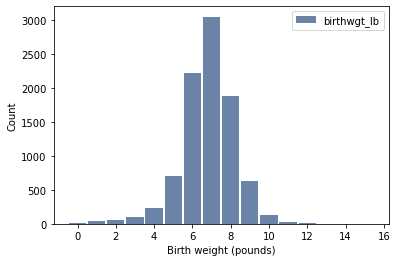

In [4]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

To create a `pmf` we need to normalize. `thinkstats2.Pmf` does this work for us

In [5]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

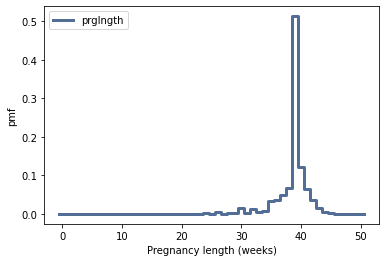

In [6]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='pmf')

In [7]:
preg = nsfg.ReadFemPreg()

live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [8]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

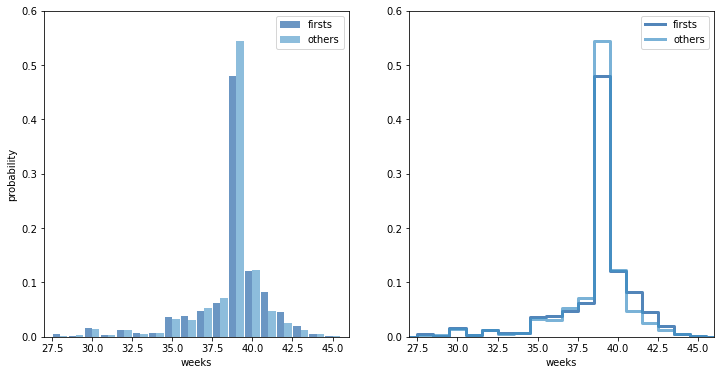

<Figure size 576x432 with 0 Axes>

In [9]:
width=0.45
axis = [27, 46, 0, 0.6]

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks',
                 ylabel='probability',
                 axis=axis)
thinkplot.PrePlot(2) # resets the color generator
thinkplot.SubPlot(2) # switches to the second figure
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks', axis=axis)

## Other Visualizations

### Differences in distributions

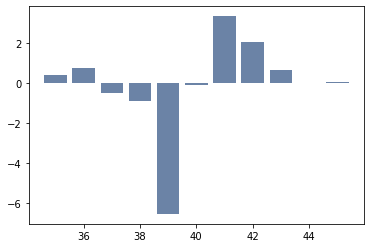

In [10]:
weeks = range(35,46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)

### The class size paradox

At many American colleges and universities, the student-to-faculty ratio is about 10:1. But students are often surprised to discover that their average class size is bigger than 10. There are two reasons for the discrepancy:
- Students typically take 4–5 classes per semester, but professors often teach 1 or 2.
- The number of students who enjoy a small class is small, but the number of students in a large class is large.

In [11]:
# College with 65 classes in a semester
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')
print(f'mean: {pmf.Mean()}')

mean: 23.692307692307693


In [12]:
# From the point of view of students
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x,x) # each class is observed by #students/class

    new_pmf.Normalize()
    return new_pmf

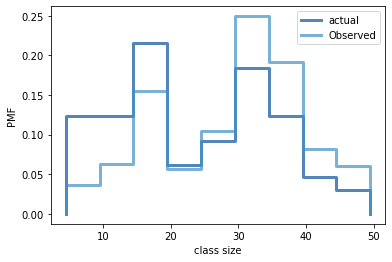

<Figure size 576x432 with 0 Axes>

In [13]:
biased_pmf = BiasPmf(pmf, label='Observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

In [14]:
print(biased_pmf.Mean())

29.123376623376625


## DataFrame indexing

In [15]:
import pandas as pd
import numpy as np

array = np.random.randn(4,2)
df = pd.DataFrame(array)
df

,0,1
0,-1.408973,-0.778794
1,-0.200296,0.723567
2,0.315505,-0.643263
3,1.035372,-0.103869


In [16]:
# changing column names
columns = ['A', 'B']
df = pd.DataFrame(array, columns=columns)
df

,A,B
0,-1.408973,-0.778794
1,-0.200296,0.723567
2,0.315505,-0.643263
3,1.035372,-0.103869


In [17]:
index = list('abcd')
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-1.408973,-0.778794
b,-0.200296,0.723567
c,0.315505,-0.643263
d,1.035372,-0.103869


In [18]:
# simple indexing - columns
df ['A']

a   -1.408973
b   -0.200296
c    0.315505
d    1.035372
Name: A, dtype: float64

In [19]:
# row indexing using row label
df.loc['a']

A   -1.408973
B   -0.778794
Name: a, dtype: float64

In [20]:
# row indexing using row position
df.iloc[2]

A    0.315505
B   -0.643263
Name: c, dtype: float64

In [21]:
# row indexing with list of labels
df.loc[['a','c']]

,A,B
a,-1.408973,-0.778794
c,0.315505,-0.643263


In [22]:
df.iloc[0:2]

,A,B
a,-1.408973,-0.778794
b,-0.200296,0.723567


## Exercises

In [23]:
resp = nsfg.ReadFemResp()

In [24]:
resp.numkdhh

0       3
1       0
2       0
3       0
4       0
       ..
7638    0
7639    0
7640    0
7641    0
7642    0
Name: numkdhh, Length: 7643, dtype: int64

In [25]:
pmf_minors = thinkstats2.Pmf(resp['numkdhh'], label='actual')

In [26]:
biased_pmf_minors = BiasPmf(pmf_minors, label = 'observed')

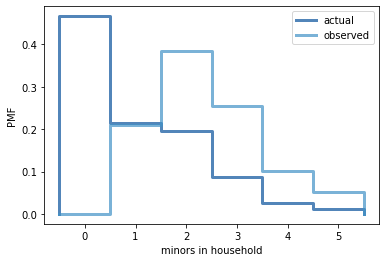

<Figure size 576x432 with 0 Axes>

In [27]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_minors, biased_pmf_minors])
thinkplot.Show(xlabel='minors in household', ylabel='PMF')

No minor children would observe a family with 0 minors in household, even though they are the most frequent arrangement.

In [28]:
print(f'mean (actual): {pmf_minors.Mean():.2f}, mean (observed): {biased_pmf_minors.Mean():.2f}')

mean (actual): 1.02, mean (observed): 2.40


In [29]:
# Functions for mean and variance for pmfs
def PmfMean(pmf):
    cumul = 0.
    for q, f in pmf.Items():
        cumul += q*f
    return cumul

def PmfVar(pmf):
    cumul = 0.
    for q, f in pmf.Items():
        cumul += f * (q - PmfMean(pmf))**2
    return cumul

**Exercise 3.3**

In [30]:
live = preg[preg.outcome == 1]
preg_map = nsfg.MakePregMap(live)

In [31]:
def Diffs(t):
    first = t[0]
    rest = t[1:]
    diffs = [first - x for x in rest]
    return diffs

Mean difference between pairs: 0.09


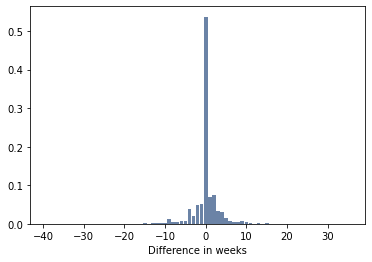

<Figure size 576x432 with 0 Axes>

In [32]:
diffs = []

for caseid, indices in preg_map.items():
    lengths = live.loc[indices].prglngth.values
    if len(lengths) >= 2:
        diffs.extend(Diffs(lengths))

mean = thinkstats2.Mean(diffs)
print(f'Mean difference between pairs: {mean:.2f}')

pmf = thinkstats2.Pmf(diffs)
thinkplot.Hist(pmf, align = 'center')
thinkplot.Show(xlabel='Difference in weeks', label='PMF')


In [33]:
import relay

In [35]:
results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

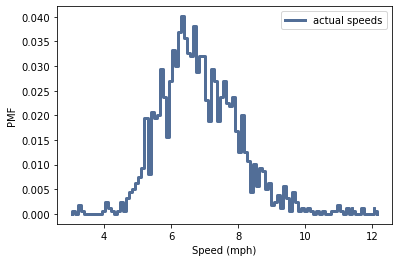

In [36]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [37]:
def ObservedPmf(pmf, speed, label=None):
    """Returns a new Pmf representing speeds observed at a given speed.

    The chance of observing a runner is proportional to the difference
    in speed.

    Args:
        pmf: distribution of actual speeds
        speed: speed of the observing runner
        label: string label for the new dist

    Returns:
        Pmf object
    """
    new = pmf.Copy(label=label)
    for val in new.Values():
        diff = abs(val - speed)
        new.Mult(val, diff)
    new.Normalize()
    return new

In [38]:
    biased = ObservedPmf(pmf, 7.5, label='observed speeds')

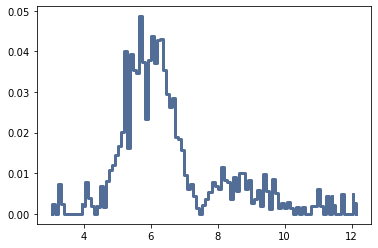

In [39]:
    thinkplot.Pmf(biased)

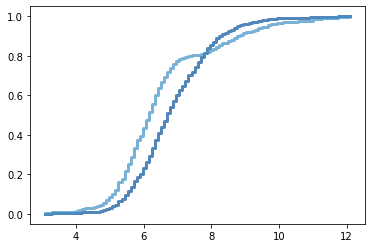

In [40]:
    cdf = thinkstats2.Cdf(pmf)
    cdf_biased = thinkstats2.Cdf(biased)

    thinkplot.PrePlot(2)
    thinkplot.Cdfs([cdf, cdf_biased])